# TCR analysis of DPT... using the VDJ object Kelvin has generated.


## Loading data

Load up all pacakges

In [70]:
import os
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm

# show the current directory
os.getcwd()


'/Users/uqssoon/Documents/Projects/Jaz-project/notebooks'

In [71]:
# software versions

sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


In [72]:
ddl.logging.print_header()

dandelion==0.3.2 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


#### This is all pre-processing done by Kelvin. DO NOT RUN THIS. 

I'm accessing the data through the HPC so the data lives at `/QRISdata/Q5688/GONZ-0001/TCR/` and `/QRISdata/Q5688/GONZ-0001_run2/TCR/`. I've assigned the locations to two variables via a dictionary.

In [4]:
# RAWFOLDER1 = "/QRISdata/Q5688/GONZ-0001/TCR"
# RAWFOLDER2 = "/QRISdata/Q5688/GONZ-0001_run2/TCR"
##  also specify the names of the folders (sans _GEX for simplicity)
# sample_dict = {
#    "CD4_L01": RAWFOLDER2,
#    "CD4_P01": RAWFOLDER1,
#    "CD4_WY": RAWFOLDER2,
#    "CD8_L01": RAWFOLDER1,
#    "CD8_P01": RAWFOLDER1,
#    "CD8_WY": RAWFOLDER2,
#    "DP_L01": RAWFOLDER1,
#    "DP_P01": RAWFOLDER1,
#    "DP_WY": RAWFOLDER1,
#    "V_CD4": RAWFOLDER1,
#    "V_CD8": RAWFOLDER2,
#    "V_DP": RAWFOLDER1,
# }



## And then read in files... using for-loop - read files, add them to a list, concatenate them, save. 

# from pathlib import Path

# vdj_list = []  # create an empty list first
# for sample in tqdm(sample_dict.keys()):
    # we will use Path to construct the path to the 10x file
    # you can also just use
    # file_path = "/QRISdata/Q5688/GONZ-0001/TCR/" + sample + "_TCR/outs/filtered_contig_annotations.csv"
    # exactly the same
#    file_path = (
#        Path(sample_dict[sample])
#        / (sample + "_TCR")
#        / "outs"
#        / "filtered_contig_annotations.csv"
#    )
#    tmp = ddl.read_10x_vdj(file_path)
#    tmp.data.cell_id = [sample + "_" + n for n in tmp.data.cell_id]
#    tmp.data.sequence_id = [sample + "_" + n for n in tmp.data.sequence_id]
#    tmp.update_metadata()
    # ok now concatenate
#    vdj_list.append(tmp)


#### Actually concatenate

# vdj = ddl.concat(vdj_list)
# vdj

### making output directory
# out_path = Path("/QRISdata/Q5688") / "kelvin" / "h5ad"
# out_path.mkdir(parents=True, exist_ok=True)
# vdj.write_h5ddl(out_path / "adata_tcr_raw.h5ddl")


#### Let's read in

In [73]:
# first do GEX object 

adata = sc.read_h5ad("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_processed_v2_BBKNN_celltypist_MS_300823.h5ad")

In [74]:
adata

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypist_annotation_colors', 'celltypist_majority_voting_colors', 'donor_colors', 'filter_rna_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'sort_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
#### I had problems loading the ddl object as it was misisng the tables module. 
# https://stackoverflow.com/questions/73029883/could-not-find-hdf5-installation-for-pytables-on-m1-mac 

## I used the: 
#pip install cython
#brew install hdf5
#brew install c-blosc
#export HDF5_DIR=/opt/homebrew/opt/hdf5 
#export BLOSC_DIR=/opt/homebrew/opt/c-blosc     on the home environment 

# And then in Jaz2023_env I did:
#pip install git+https://github.com/PyTables/PyTables

In [75]:
vdj = ddl.read_h5ddl("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_tcr_raw.h5ddl")


In [76]:
vdj

Dandelion class object with n_obs = 101224 and n_contigs = 169228
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'jun

In [77]:
vdj.data

,cell_id,sequence_id,sequence,sequence_aa,productive,complete_vdj,vj_in_frame,junction,junction_aa,locus,...,fwr4,fwr4_aa,clone_id,raw_consensus_id_10x,exact_subclonotype_id_10x,high_confidence_10x,filtered_10x,is_cell_10x,is_asm_cell_10x,rearrangement_status
sequence_id,,,,,,,,,,,,,,,,,,,,,
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0,TATATGGGAGAACTCACTGGGTTCTTCCCCAGGAGGACCAAGCCCT...,MGPGLLCWVLLCLLGAGPVDAGVTQSPTHLIKTRGQHVTLRCSPIS...,True,True,,TGTGCCAGCAGCCTTCACGGGGCCTTATTGGGGACCCAGTACTTC,CASSLHGALLGTQYF,TRB,...,GGGCCAGGCACGCGGCTCCTGGTGCTCG,GPGTRLLVL,clonotype4848,clonotype4848_consensus_1,1.0,True,True,NaN,True,standard
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0,AAAGCAGATTCTTTTTATGATTTTTAAAGTAGAAATATCCATTCCA...,MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...,True,True,,TGTGCCATAAATAGGGATAACCAGGGAGGAAAGCTTATCTTC,CAINRDNQGGKLIF,TRA,...,GGACAGGGAACGGAGTTATCTGTGAAACCCA,GQGTELSVKP,clonotype4848,clonotype4848_consensus_2,1.0,True,True,NaN,True,standard
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0,TTGGGGGAGAGGGGTGGGTACTGGAGAAGACCAGCCCCTTCGCCAA...,,False,False,,,,TRB,...,,,,,NaN,True,True,NaN,True,unknown
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0,CD4_L01_AAACCTGAGAGCTATA-1,CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0,CCCACATGAAGTGTCTACCTTCTGCAGACTCCAATGGCTCAGGAAC...,MWGVFLLYVSMKMGGTTGQNIDQPTEMTATEGAIVQINCTYQTSGF...,True,True,,TGTGCTGTGAGTTCCCTCAAAGCTGCAGGCAACAAGCTAACTTTT,CAVSSLKAAGNKLTF,TRA,...,,,,,NaN,False,True,NaN,False,standard
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0,CD4_L01_AAACCTGAGATGAGAG-1,CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0,GGAGTGATCCTGATCTGGTAAAGCTCCCATCCTGCCCTGACCCTGC...,MGTRLLFWVAFCLLGAYHTGAGVSQSPSNKVTEKGKDVELRCDPIS...,True,True,,TGTGCCAGCAGCCGGGGGAAGGGACACATTCAGTACTTC,CASSRGKGHIQYF,TRB,...,,,,,NaN,False,True,NaN,False,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11,V_DP_TTTGTCAGTCTACCTC-1,V_DP_TTTGTCAGTCTACCTC-1_contig_1-11,TGGGGACTCTGCAGGGGAGCGCTGTCAGCATGACACGTGTTAGCTT...,MTRVSLLWAVVVSTCLESGMAQTVTQSQPEMSVQEAETVTLSCTYD...,True,True,,TGTGCTTTCATGAAGCGGCCCCTCTATGGTCAGAATTTTGTCTTT,CAFMKRPLYGQNFVF,TRA,...,,,,,NaN,False,True,NaN,False,standard
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11,V_DP_TTTGTCAGTTCGTGAT-1,V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11,AGTCAGAGGCCCCATCTCAGACCCGAGGCTAGCATGGGCTGCAGGC...,MGCRLLCCAVLCLLGAVPMETGVTQTPRHLVMGMTNKKSLKCEQHL...,True,True,,TGTGCCAGCAGCCAAGAAGGGTTCGGACAGTATCACACCGGGGAGC...,CASSQEGFGQYHTGELFF,TRB,...,GGAGAAGGCTCTAGGCTGACCGTACTGG,GEGSRLTVL,clonotype5,clonotype5_consensus_1,1.0,True,True,NaN,True,standard
V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11,V_DP_TTTGTCAGTTCGTGAT-1,V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11,TTTCTTAGTTGGGATTCTCCATATTTCAGATATAAGATTTCAGTTC...,METLLGLLILWLQLQWVSSKQEVTQIPAALSVPEGENLVLNCSFTD...,True,True,,TGTGCTGCGGACTTTGGAAATGAGAAATTAACCTTT,CAADFGNEKLTF,TRA,...,GGGACTGGAACAAGACTCACCATCATACCCA,GTGTRLTIIP,clonotype5,clonotype5_consensus_2,1.0,True,True,NaN,True,standard


In [78]:
vdj.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,j_call_abT_VDJ_main,v_call_abT_VJ_main,j_call_abT_VJ_main,v_call_gdT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
CD4_L01_AAACCTGAGAACTGTA-1,clonotype4848,4803,TRB|TRB,TRA,True|False,True,TRBV5-5,None,TRBJ2-5|TRBJ1-2,TRAV12-2,...,TRBJ2-5,TRAV12-2,TRAJ23,None,None|None,Multi,Extra VDJ + TRA,Extra pair,Multi,standard
CD4_L01_AAACCTGAGAGCTATA-1,None,None,None,TRA,None,True,None,None,None,TRAV1-2,...,None,TRAV1-2,TRAJ17,None,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGATGAGAG-1,None,None,TRB,None,True,None,TRBV7-2,None,TRBJ2-4,None,...,TRBJ2-4,None,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None
CD4_L01_AAACCTGAGGAGCGAG-1,clonotype5251,5617,None,TRA,None,True,None,None,None,TRAV8-3,...,None,TRAV8-3,TRAJ16,None,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGGCAGTCA-1,clonotype1103,1210,TRB,TRA,True,True,TRBV6-1,None,TRBJ2-1,TRAV38-2/DV8,...,TRBJ2-1,TRAV38-2/DV8,TRAJ47,None,None,None,TRB + TRA,Single pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAGTCCTCCAT-1,None,None,TRB,TRA,True,False,TRBV6-6,None,TRBJ2-1,TRAV8-3,...,TRBJ2-1,TRAV8-3,TRAJ43,None,None,None,TRB + TRA,Single pair,standard,standard
V_DP_TTTGTCAGTCTACCTC-1,None,None,None,TRA,None,True,None,None,None,TRAV38-1,...,None,TRAV38-1,TRAJ26,None,None,None,Orphan TRA,Orphan VJ,None,standard
V_DP_TTTGTCAGTTCGTGAT-1,clonotype5,5,TRB,TRA,True,True,TRBV4-2,None,TRBJ2-2,TRAV21,...,TRBJ2-2,TRAV21,TRAJ48,None,None,None,TRB + TRA,Single pair,standard,standard
V_DP_TTTGTCATCAGCTTAG-1,clonotype589,479,TRB,None,True,None,TRBV5-1,None,TRBJ2-5,None,...,TRBJ2-5,None,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None


In [79]:
# This filters the contigs and synchronises relevant information between the objects. Once linked up like this, any new information can be copied over from the Dandelion object via ddl.tl.transfer(). There will be an example later in the notebook.

# here I am also making new objects = vdjx and adatax

vdjx, adatax = ddl.pp.check_contigs(vdj, adata)

Preparing data: 140115it [00:07, 17581.61it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 94745/94745 [01:05<00:00, 1457.20it/s]


Under the hood, the Dandelion object is essentially two data frames. .data holds the AIRR-compliant contig space table, while .metadata is an .obs equivalent that parses the contig information to a cell level and can be easily integrated with a Scanpy object.

In [10]:
vdjx
# this new DDL object holds the filtered DDL object.

Dandelion class object with n_obs = 56818 and n_contigs = 169228
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status', 'ambiguous'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_a

In [81]:
vdjx.data

,cell_id,sequence_id,sequence,sequence_aa,productive,complete_vdj,vj_in_frame,junction,junction_aa,locus,...,fwr4_aa,clone_id,raw_consensus_id_10x,exact_subclonotype_id_10x,high_confidence_10x,filtered_10x,is_cell_10x,is_asm_cell_10x,rearrangement_status,ambiguous
sequence_id,,,,,,,,,,,,,,,,,,,,,
CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_1-0,TATATGGGAGAACTCACTGGGTTCTTCCCCAGGAGGACCAAGCCCT...,MGPGLLCWVLLCLLGAGPVDAGVTQSPTHLIKTRGQHVTLRCSPIS...,True,True,,TGTGCCAGCAGCCTTCACGGGGCCTTATTGGGGACCCAGTACTTC,CASSLHGALLGTQYF,TRB,...,GPGTRLLVL,clonotype4848,clonotype4848_consensus_1,1.0,True,True,NaN,True,standard,T
CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_2-0,AAAGCAGATTCTTTTTATGATTTTTAAAGTAGAAATATCCATTCCA...,MKSLRVLLVILWLQLSWVWSQQKEVEQNSGPLSVPEGAIASLNCTY...,True,True,,TGTGCCATAAATAGGGATAACCAGGGAGGAAAGCTTATCTTC,CAINRDNQGGKLIF,TRA,...,GQGTELSVKP,clonotype4848,clonotype4848_consensus_2,1.0,True,True,NaN,True,standard,T
CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0,CD4_L01_AAACCTGAGAACTGTA-1,CD4_L01_AAACCTGAGAACTGTA-1_contig_3-0,TTGGGGGAGAGGGGTGGGTACTGGAGAAGACCAGCCCCTTCGCCAA...,,False,False,,,,TRB,...,,,,NaN,True,True,NaN,True,unknown,T
CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0,CD4_L01_AAACCTGAGAGCTATA-1,CD4_L01_AAACCTGAGAGCTATA-1_contig_1-0,CCCACATGAAGTGTCTACCTTCTGCAGACTCCAATGGCTCAGGAAC...,MWGVFLLYVSMKMGGTTGQNIDQPTEMTATEGAIVQINCTYQTSGF...,True,True,,TGTGCTGTGAGTTCCCTCAAAGCTGCAGGCAACAAGCTAACTTTT,CAVSSLKAAGNKLTF,TRA,...,,,,NaN,False,True,NaN,False,standard,F
CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0,CD4_L01_AAACCTGAGATGAGAG-1,CD4_L01_AAACCTGAGATGAGAG-1_contig_1-0,GGAGTGATCCTGATCTGGTAAAGCTCCCATCCTGCCCTGACCCTGC...,MGTRLLFWVAFCLLGAYHTGAGVSQSPSNKVTEKGKDVELRCDPIS...,True,True,,TGTGCCAGCAGCCGGGGGAAGGGACACATTCAGTACTTC,CASSRGKGHIQYF,TRB,...,,,,NaN,False,True,NaN,False,standard,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAGTCTACCTC-1_contig_1-11,V_DP_TTTGTCAGTCTACCTC-1,V_DP_TTTGTCAGTCTACCTC-1_contig_1-11,TGGGGACTCTGCAGGGGAGCGCTGTCAGCATGACACGTGTTAGCTT...,MTRVSLLWAVVVSTCLESGMAQTVTQSQPEMSVQEAETVTLSCTYD...,True,True,,TGTGCTTTCATGAAGCGGCCCCTCTATGGTCAGAATTTTGTCTTT,CAFMKRPLYGQNFVF,TRA,...,,,,NaN,False,True,NaN,False,standard,T
V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11,V_DP_TTTGTCAGTTCGTGAT-1,V_DP_TTTGTCAGTTCGTGAT-1_contig_1-11,AGTCAGAGGCCCCATCTCAGACCCGAGGCTAGCATGGGCTGCAGGC...,MGCRLLCCAVLCLLGAVPMETGVTQTPRHLVMGMTNKKSLKCEQHL...,True,True,,TGTGCCAGCAGCCAAGAAGGGTTCGGACAGTATCACACCGGGGAGC...,CASSQEGFGQYHTGELFF,TRB,...,GEGSRLTVL,clonotype5,clonotype5_consensus_1,1.0,True,True,NaN,True,standard,T
V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11,V_DP_TTTGTCAGTTCGTGAT-1,V_DP_TTTGTCAGTTCGTGAT-1_contig_2-11,TTTCTTAGTTGGGATTCTCCATATTTCAGATATAAGATTTCAGTTC...,METLLGLLILWLQLQWVSSKQEVTQIPAALSVPEGENLVLNCSFTD...,True,True,,TGTGCTGCGGACTTTGGAAATGAGAAATTAACCTTT,CAADFGNEKLTF,TRA,...,GTGTRLTIIP,clonotype5,clonotype5_consensus_2,1.0,True,True,NaN,True,standard,T


In [80]:
vdjx.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,d_call_abT_VDJ_main,j_call_abT_VDJ_main,v_call_abT_VJ_main,j_call_abT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
CD4_L01_AAACCTGAGAGCTATA-1,None,None,None,TRA,None,True,None,None,None,TRAV1-2,...,None,None,TRAV1-2,TRAJ17,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGGAGCGAG-1,clonotype5251,3932,None,TRA,None,True,None,None,None,TRAV8-3,...,None,None,TRAV8-3,TRAJ16,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGGCAGTCA-1,clonotype1103,526,TRB,TRA,True,True,TRBV6-1,None,TRBJ2-1,TRAV38-2/DV8,...,None,TRBJ2-1,TRAV38-2/DV8,TRAJ47,None,None,TRB + TRA,Single pair,standard,standard
CD4_L01_AAACCTGAGTCAAGCG-1,clonotype1244,837,TRB,TRA,True,True,TRBV20-1,None,TRBJ2-7,TRAV23/DV6,...,None,TRBJ2-7,TRAV23/DV6,TRAJ15,None,None,TRB + TRA,Single pair,standard,standard
CD4_L01_AAACCTGAGTCCTCCT-1,clonotype248,229,TRB,TRA,True,True,TRBV20-1,None,TRBJ1-2,TRAV9-2,...,None,TRBJ1-2,TRAV9-2,TRAJ35,None,None,TRB + TRA,Single pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAAGGTTACCT-1,None,None,None,TRA,None,True,None,None,None,TRAV12-3,...,None,None,TRAV12-3,TRAJ49,None,None,Orphan TRA,Orphan VJ,None,standard
V_DP_TTTGTCAAGTGAAGTT-1,None,None,None,TRA,None,True,None,None,None,TRAV38-2/DV8,...,None,None,TRAV38-2/DV8,TRAJ26,None,None,Orphan TRA,Orphan VJ,None,standard
V_DP_TTTGTCACAAGTAGTA-1,clonotype3,2,TRB,None,True,None,TRBV19,TRBD1,TRBJ2-3,None,...,TRBD1,TRBJ2-3,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None
V_DP_TTTGTCACACAAGCCC-1,clonotype587,916,TRB,None,True,None,TRBV5-1,None,TRBJ2-7,None,...,None,TRBJ2-7,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None


In [12]:
adatax
## now my adata.obs also contain all the VDJ data found in vdj.metada

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VD

In [13]:
adatax.obs

,sample,sort_type,donor,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet_score,n_genes,gmm_pct_count_clusters_keep,...,d_call_abT_VDJ_main,j_call_abT_VDJ_main,v_call_abT_VJ_main,j_call_abT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
CD4_L01_AAACCTGAGAGCTATA-1,CD4_L01,CD4,L01,722,1726.0,14.0,0.811124,0.456193,722,True,...,None,None,TRAV1-2,TRAJ17,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGGAGCGAG-1,CD4_L01,CD4,L01,562,1443.0,15.0,1.039501,0.156962,562,True,...,None,None,TRAV8-3,TRAJ16,None,None,Orphan TRA,Orphan VJ,None,standard
CD4_L01_AAACCTGAGGCAGTCA-1,CD4_L01,CD4,L01,507,1141.0,4.0,0.350570,0.216129,507,True,...,None,TRBJ2-1,TRAV38-2/DV8,TRAJ47,None,None,TRB + TRA,Single pair,standard,standard
CD4_L01_AAACCTGAGTCAAGCG-1,CD4_L01,CD4,L01,602,1410.0,16.0,1.134752,0.408219,602,True,...,None,TRBJ2-7,TRAV23/DV6,TRAJ15,None,None,TRB + TRA,Single pair,standard,standard
CD4_L01_AAACCTGAGTCCTCCT-1,CD4_L01,CD4,L01,433,1064.0,7.0,0.657895,0.188953,433,True,...,None,TRBJ1-2,TRAV9-2,TRAJ35,None,None,TRB + TRA,Single pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCACATATGGTC-1,V_DP,DP,V,566,1257.0,0.0,0.000000,0.316456,566,True,...,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig
V_DP_TTTGTCACATGGTAGG-1,V_DP,DP,V,341,775.0,0.0,0.000000,0.351801,341,True,...,None,None,TRAV38-2/DV8,TRAJ40,None,None,Orphan TRA,Orphan VJ,None,standard
V_DP_TTTGTCATCCTTGCCA-1,V_DP,DP,V,439,1000.0,0.0,0.000000,0.211679,439,True,...,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig
V_DP_TTTGTCATCGCCATAA-1,V_DP,DP,V,540,1165.0,0.0,0.000000,0.220339,540,True,...,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig,No_contig


The thing you’re most likely to find yourself doing manually with the Dandelion object is modifying cell names to match your GEX naming convention. The cell names can be found in <.data.cell_id>, change those however you see fit and then call <.update_metadata()> to regenerate the per-cell <.obs> equivalent.

In [14]:
#vdj.data.cell_id = [result of modification procedure on existing vdj.data.cell_id]
#vdj.update_metadata()

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


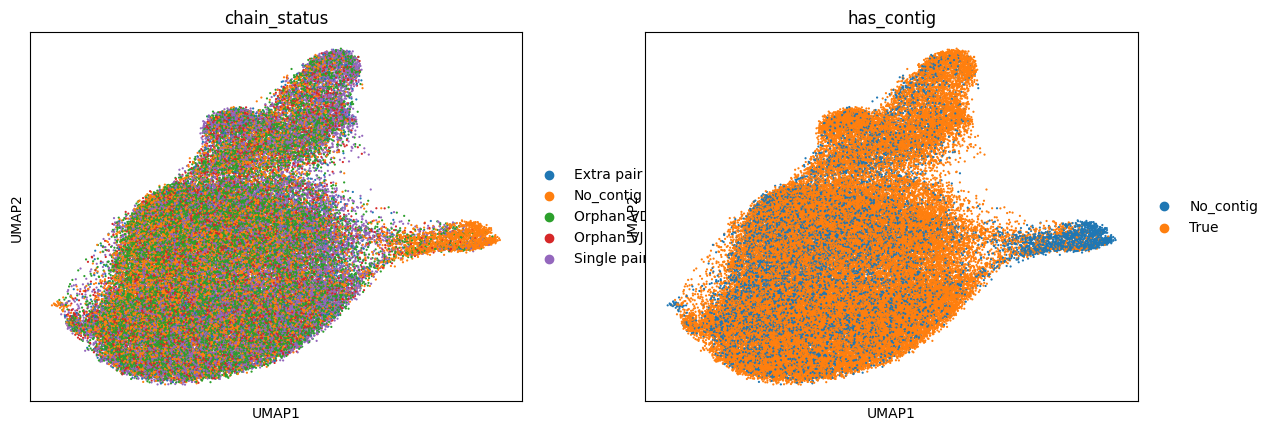

In [15]:
# For now, let’s take a look at the chain status (as gotten from the Dandelion object).

sc.pl.umap(adatax, color=["chain_status", "has_contig"], size = 10)

A core element of VDJ analysis is clonotype calling, roughly equivalent to clustering cells in GEX processing. Dandelion requires the clones it calls to have identical V and J genes, along with no more than 15% mismatches in the CDR3 sequences (common practice in BCR analysis).

For TCR clonotype calling, you can perform common practice nucleotide sequence identity by passing identity=1 and key="junction" to the function.

In [82]:
ddl.tl.find_clones(vdjx, identity = 1, key = 'junction')

Finding clones based on abT cell VDJ chains : 100%|██████████| 577/577 [00:02<00:00, 233.25it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 49358/49358 [00:00<00:00, 853225.86it/s]


We can compute a graph based on Levenshtein distance of the complete contig sequence. A NetworkX representation of it is now saved in vdj.graph.

The 10x-provided AIRR file is missing columns like sequence_alignment and sequence_alignment_aa so we will use the next best thing, which is sequence or sequence_aa. Note that these columns are not-gapped.

Specify key = 'sequence_aa' to toggle this behavior. Can also try junction or junction_aa if just want to visualise the CDR3 linkage.

In [19]:
#ddl.tl.generate_network(vdjx, key = 'sequence_aa')
## # if this step crashes, it may be because you need more memory... need to it on HPC? 

Since we now know what our clonotype calls are, we can quantify clonal expansion. It’s possible to cap this at a desired maximum clonotype size.

In [83]:
ddl.tl.clone_size(vdjx)
# this makes an independent column with the provided max_size in its name
# ddl.tl.clone_size (vdjx, max_size = 3)

Now that our Dandelion object has analysis information inside it, we can copy it over to the Scanpy object to have access to it there. The graph gets turned into the Scanpy standard forms of .obsp['vdj_distances'] and .obsp['vdj_connectivites'] for potential downstream use.

##### CHECK WITH KELVIN - IS THIS VDJ OR VDJX!

In [84]:
vdjx.update_plus()  
# The .metadata slot in Dandelion class automatically initializes whenever the .data slot is filled. However, it only returns a standard number of columns that are pre-specified. To retrieve other columns from the .data slot, we can update the metadata with ddl.update_metadata and specify the options retrieve and retrieve_mode.
# There is a new sub-function - update_plus() that will try and retrieve frequently used columns such as np1_length, np2_length
vdjx

Dandelion class object with n_obs = 56818 and n_contigs = 169228
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status', 'ambiguous'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_a

In [85]:
vdjx.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,j_call_abT_VDJ_main,v_call_abT_VJ_main,j_call_abT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ,clone_id_size
CD4_L01_AAACCTGAGAGCTATA-1,None,None,None,TRA,None,True,None,None,None,TRAV1-2,...,None,TRAV1-2,TRAJ17,None,None,Orphan TRA,Orphan VJ,None,standard,0.0
CD4_L01_AAACCTGAGGAGCGAG-1,None,None,None,TRA,None,True,None,None,None,TRAV8-3,...,None,TRAV8-3,TRAJ16,None,None,Orphan TRA,Orphan VJ,None,standard,0.0
CD4_L01_AAACCTGAGGCAGTCA-1,abT_399_2_6_1783_2_5,37807,TRB,TRA,True,True,TRBV6-1,None,TRBJ2-1,TRAV38-2/DV8,...,TRBJ2-1,TRAV38-2/DV8,TRAJ47,None,None,TRB + TRA,Single pair,standard,standard,1.0
CD4_L01_AAACCTGAGTCAAGCG-1,abT_482_4_58_508_3_3,30140,TRB,TRA,True,True,TRBV20-1,None,TRBJ2-7,TRAV23/DV6,...,TRBJ2-7,TRAV23/DV6,TRAJ15,None,None,TRB + TRA,Single pair,standard,standard,1.0
CD4_L01_AAACCTGAGTCCTCCT-1,abT_449_2_22_688_4_2,30141,TRB,TRA,True,True,TRBV20-1,None,TRBJ1-2,TRAV9-2,...,TRBJ1-2,TRAV9-2,TRAJ35,None,None,TRB + TRA,Single pair,standard,standard,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAAGGTTACCT-1,None,None,None,TRA,None,True,None,None,None,TRAV12-3,...,None,TRAV12-3,TRAJ49,None,None,Orphan TRA,Orphan VJ,None,standard,0.0
V_DP_TTTGTCAAGTGAAGTT-1,None,None,None,TRA,None,True,None,None,None,TRAV38-2/DV8,...,None,TRAV38-2/DV8,TRAJ26,None,None,Orphan TRA,Orphan VJ,None,standard,0.0
V_DP_TTTGTCACAAGTAGTA-1,abT_8_3_24,7,TRB,None,True,None,TRBV19,TRBD1,TRBJ2-3,None,...,TRBJ2-3,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,57.0
V_DP_TTTGTCACACAAGCCC-1,abT_488_3_12,332,TRB,None,True,None,TRBV5-1,None,TRBJ2-7,None,...,TRBJ2-7,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,5.0


In [90]:
# do the actual transfer
ddl.tl.transfer(adatax, vdjx, overwrite = True)

In [91]:
# check..
adatax

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VD

In [93]:
vdjx

Dandelion class object with n_obs = 56818 and n_contigs = 169228
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'complete_vdj', 'vj_in_frame', 'junction', 'junction_aa', 'locus', 'v_call', 'j_call', 'c_call', 'd_call', 'consensus_count', 'duplicate_count', 'cdr3_start', 'cdr3_end', 'fwr1_start', 'fwr1_end', 'fwr1', 'fwr1_aa', 'cdr1_start', 'cdr1_end', 'cdr1', 'cdr1_aa', 'fwr2_start', 'fwr2_end', 'fwr2', 'fwr2_aa', 'cdr2_start', 'cdr2_end', 'cdr2', 'cdr2_aa', 'fwr3_start', 'fwr3_end', 'fwr3', 'fwr3_aa', 'fwr4_start', 'fwr4_end', 'fwr4', 'fwr4_aa', 'clone_id', 'raw_consensus_id_10x', 'exact_subclonotype_id_10x', 'high_confidence_10x', 'filtered_10x', 'is_cell_10x', 'is_asm_cell_10x', 'rearrangement_status', 'ambiguous'
    metadata: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_a

In [92]:
adatax.obs['clone_id']

CD4_L01_AAACCTGAGAGCTATA-1                    None
CD4_L01_AAACCTGAGGAGCGAG-1                    None
CD4_L01_AAACCTGAGGCAGTCA-1    abT_399_2_6_1783_2_5
CD4_L01_AAACCTGAGTCAAGCG-1    abT_482_4_58_508_3_3
CD4_L01_AAACCTGAGTCCTCCT-1    abT_449_2_22_688_4_2
                                      ...         
V_DP_TTTGTCACATATGGTC-1                  No_contig
V_DP_TTTGTCACATGGTAGG-1                       None
V_DP_TTTGTCATCCTTGCCA-1                  No_contig
V_DP_TTTGTCATCGCCATAA-1                  No_contig
V_DP_TTTGTCATCTTGTTTG-1                  No_contig
Name: clone_id, Length: 71564, dtype: object

## Saving this raw object

In [94]:
vdjx.write_h5ddl("adata_tcr_checked_MS_040923.h5ddl")
adatax.write_h5ad("adata_processed_v2_tcr_MS_040923.h5ad")

### checking out some analysis

In [65]:
adatax = sc.read_h5ad("/Users/uqssoon/Documents/Projects/Jaz-project/Output_MS/objects/adata_processed_v2_tcr_MS_040923.h5ad")

In [33]:
### Note: cannot run this as we have no network generated just yet 
# ddl.pl.clone_network(adatax, color="clone_id_size")

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

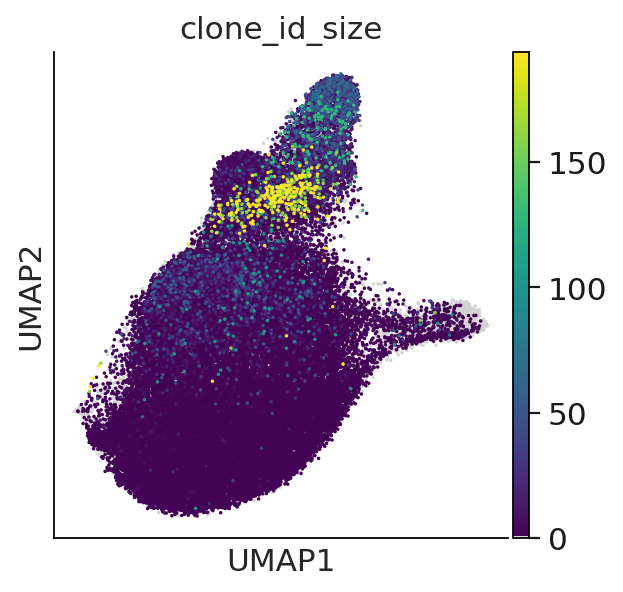

In [95]:
import tools

sc.pl.umap(adatax, color= ['clone_id_size'], color_map = tools.cmp(), size = 10,)

In [96]:
ddl.tl.clone_size (vdjx)

In [98]:
# To remove any of the clone size 0 which are orphan chains, we can run this: 
ddl.tl.clone_size (vdjx, max_size = 3)
vdjx.update_plus()  
ddl.tl.transfer(adatax, vdjx, overwrite= True)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

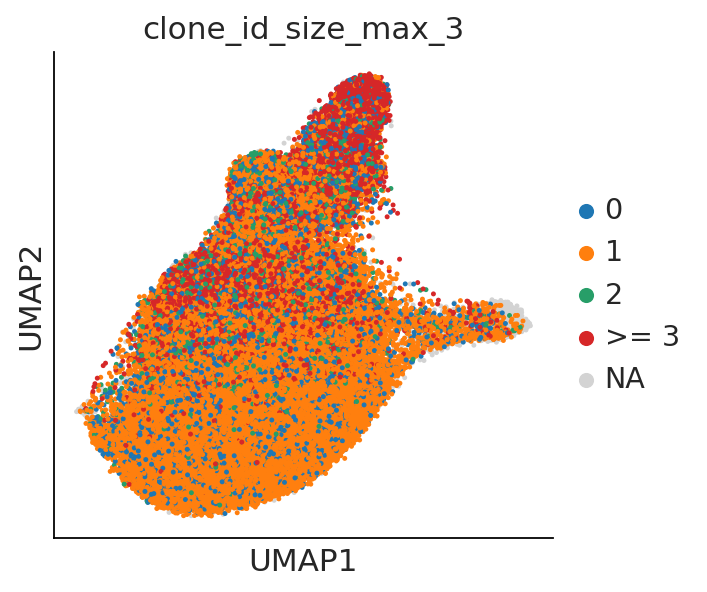

In [99]:
sc.pl.umap(adatax, color="clone_id_size_max_3", size = 20)

In [100]:
#### If you have done up scanpy's plotting defaults, you can reset it before going forward further.

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline


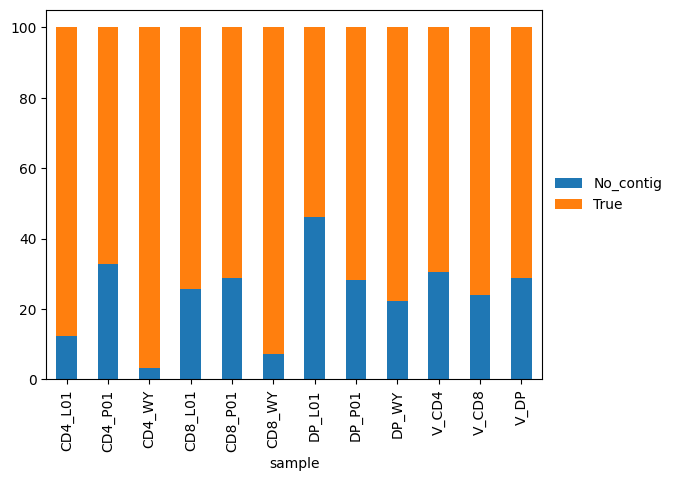

In [26]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)


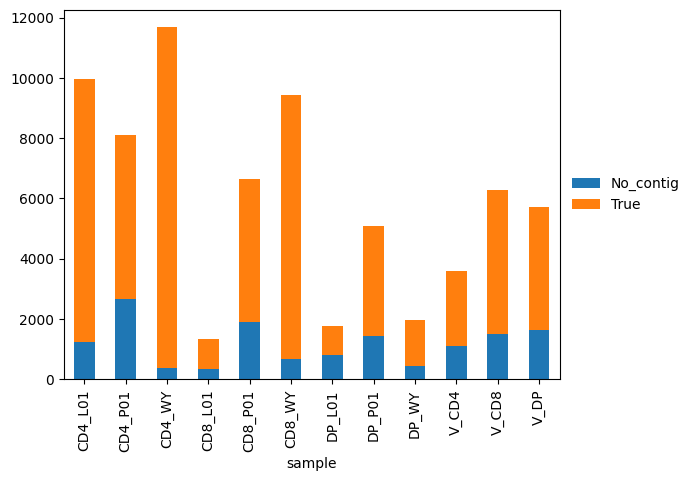

In [27]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

<Axes: xlabel='True'>

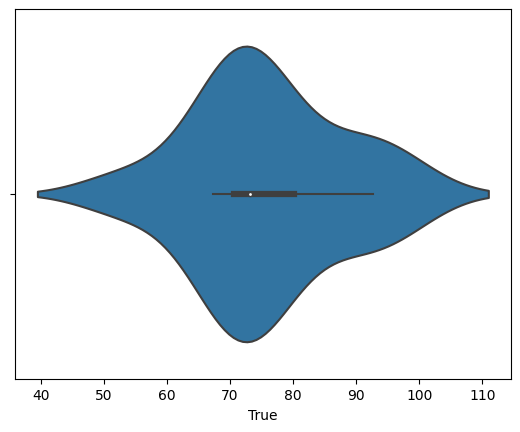

In [28]:
import seaborn as sns

df = pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["has_contig"],
).apply(lambda r: r / r.sum() * 100, axis=1)

sns.violinplot(data=df, x="True")

In [101]:
vdjx.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,v_call_abT_VJ_main,j_call_abT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ,clone_id_size,clone_id_size_max_3
CD4_L01_AAACCTGAGAGCTATA-1,None,None,None,TRA,None,True,None,None,None,TRAV1-2,...,TRAV1-2,TRAJ17,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
CD4_L01_AAACCTGAGGAGCGAG-1,None,None,None,TRA,None,True,None,None,None,TRAV8-3,...,TRAV8-3,TRAJ16,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
CD4_L01_AAACCTGAGGCAGTCA-1,abT_399_2_6_1783_2_5,37807,TRB,TRA,True,True,TRBV6-1,None,TRBJ2-1,TRAV38-2/DV8,...,TRAV38-2/DV8,TRAJ47,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
CD4_L01_AAACCTGAGTCAAGCG-1,abT_482_4_58_508_3_3,30140,TRB,TRA,True,True,TRBV20-1,None,TRBJ2-7,TRAV23/DV6,...,TRAV23/DV6,TRAJ15,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
CD4_L01_AAACCTGAGTCCTCCT-1,abT_449_2_22_688_4_2,30141,TRB,TRA,True,True,TRBV20-1,None,TRBJ1-2,TRAV9-2,...,TRAV9-2,TRAJ35,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAAGGTTACCT-1,None,None,None,TRA,None,True,None,None,None,TRAV12-3,...,TRAV12-3,TRAJ49,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
V_DP_TTTGTCAAGTGAAGTT-1,None,None,None,TRA,None,True,None,None,None,TRAV38-2/DV8,...,TRAV38-2/DV8,TRAJ26,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
V_DP_TTTGTCACAAGTAGTA-1,abT_8_3_24,7,TRB,None,True,None,TRBV19,TRBD1,TRBJ2-3,None,...,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,57.0,>= 3
V_DP_TTTGTCACACAAGCCC-1,abT_488_3_12,332,TRB,None,True,None,TRBV5-1,None,TRBJ2-7,None,...,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,5.0,>= 3


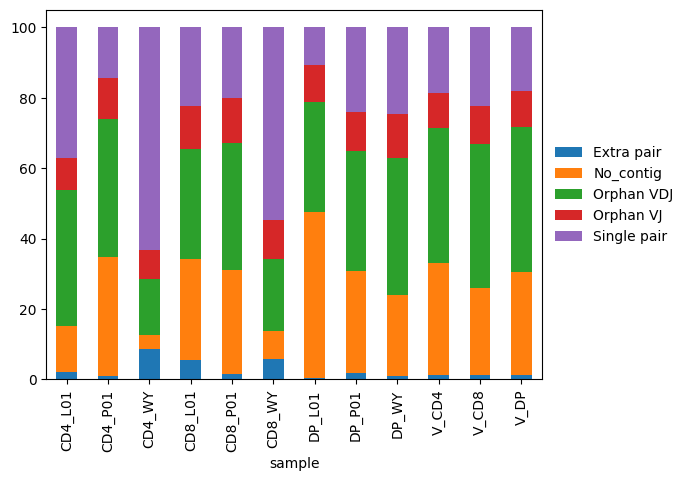

In [30]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

Another common VDJ analysis request is to examine the distribution of shared clonotypes between cells of different metadata groups. Dandelion can do this as a circos plot.

In [102]:
ddl.tl.clone_overlap(
    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)


In [103]:
adatax.uns['clone_overlap']

,DP,MAIT cells,Regulatory T cells,Tcm/Naive cytotoxic T cells,Tcm/Naive helper T cells,Tem/Effector helper T cells,Tem/Temra cytotoxic T cells,Tem/Trm cytotoxic T cells
abT_100_1_1_1962_4_3,0,0,0,0,1,0,0,0
abT_100_2_1_1237_3_2,0,0,0,0,1,0,0,0
abT_101_1_1,0,0,0,0,1,0,0,0
abT_101_1_2_526_1_1,0,0,0,0,1,0,0,0
abT_101_2_1_1002_4_2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
abT_9_7_5,0,0,0,0,1,0,0,0
abT_9_7_6,0,0,0,0,1,0,0,0
abT_9_8_1,0,0,0,0,1,0,0,0
abT_9_8_2_1553_1_1,0,0,0,1,0,0,0,0


In [104]:
adatax.obs.clone_id

CD4_L01_AAACCTGAGAGCTATA-1                    None
CD4_L01_AAACCTGAGGAGCGAG-1                    None
CD4_L01_AAACCTGAGGCAGTCA-1    abT_399_2_6_1783_2_5
CD4_L01_AAACCTGAGTCAAGCG-1    abT_482_4_58_508_3_3
CD4_L01_AAACCTGAGTCCTCCT-1    abT_449_2_22_688_4_2
                                      ...         
V_DP_TTTGTCACATATGGTC-1                  No_contig
V_DP_TTTGTCACATGGTAGG-1                       None
V_DP_TTTGTCATCCTTGCCA-1                  No_contig
V_DP_TTTGTCATCGCCATAA-1                  No_contig
V_DP_TTTGTCATCTTGTTTG-1                  No_contig
Name: clone_id, Length: 71564, dtype: category
Categories (42305, object): ['No_contig', 'None', 'abT_1_1_1_1140_3_7', 'abT_1_1_2', ..., 'abT_577_5_12', 'abT_577_6_1', 'abT_577_6_3_206_3_1', 'abT_577_6_4']

In [105]:
pd.crosstab(adatax.obs['celltypist_annotation'], adatax.obs['clone_id'])

clone_id,No_contig,None,abT_1_1_1_1140_3_7,abT_1_1_2,abT_1_1_2_121_6_3,abT_1_2_1_1566_3_3,abT_1_2_2,abT_1_2_3,abT_1_3_1_1506_4_16,abT_1_3_2_218_5_2,...,abT_577_5_6_900_3_2,abT_577_5_7_182_3_2,abT_577_5_8_1830_3_4,abT_577_5_9,abT_577_5_10_890_2_6,abT_577_5_11_120_5_1,abT_577_5_12,abT_577_6_1,abT_577_6_3_206_3_1,abT_577_6_4
celltypist_annotation,,,,,,,,,,,,,,,,,,,,,
DP,4435,1567,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MAIT cells,361,378,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Regulatory T cells,47,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcm/Naive cytotoxic T cells,1282,944,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Tcm/Naive helper T cells,7405,3506,1,0,0,1,0,1,1,0,...,1,1,1,0,1,1,0,1,0,1
Tem/Effector helper T cells,171,134,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tem/Temra cytotoxic T cells,339,350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tem/Trm cytotoxic T cells,706,526,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
vdjx.metadata

,clone_id,clone_id_by_size,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,...,v_call_abT_VJ_main,j_call_abT_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ,clone_id_size,clone_id_size_max_3
CD4_L01_AAACCTGAGAGCTATA-1,None,None,None,TRA,None,True,None,None,None,TRAV1-2,...,TRAV1-2,TRAJ17,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
CD4_L01_AAACCTGAGGAGCGAG-1,None,None,None,TRA,None,True,None,None,None,TRAV8-3,...,TRAV8-3,TRAJ16,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
CD4_L01_AAACCTGAGGCAGTCA-1,abT_399_2_6_1783_2_5,37807,TRB,TRA,True,True,TRBV6-1,None,TRBJ2-1,TRAV38-2/DV8,...,TRAV38-2/DV8,TRAJ47,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
CD4_L01_AAACCTGAGTCAAGCG-1,abT_482_4_58_508_3_3,30140,TRB,TRA,True,True,TRBV20-1,None,TRBJ2-7,TRAV23/DV6,...,TRAV23/DV6,TRAJ15,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
CD4_L01_AAACCTGAGTCCTCCT-1,abT_449_2_22_688_4_2,30141,TRB,TRA,True,True,TRBV20-1,None,TRBJ1-2,TRAV9-2,...,TRAV9-2,TRAJ35,None,None,TRB + TRA,Single pair,standard,standard,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V_DP_TTTGTCAAGGTTACCT-1,None,None,None,TRA,None,True,None,None,None,TRAV12-3,...,TRAV12-3,TRAJ49,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
V_DP_TTTGTCAAGTGAAGTT-1,None,None,None,TRA,None,True,None,None,None,TRAV38-2/DV8,...,TRAV38-2/DV8,TRAJ26,None,None,Orphan TRA,Orphan VJ,None,standard,0.0,0
V_DP_TTTGTCACAAGTAGTA-1,abT_8_3_24,7,TRB,None,True,None,TRBV19,TRBD1,TRBJ2-3,None,...,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,57.0,>= 3
V_DP_TTTGTCACACAAGCCC-1,abT_488_3_12,332,TRB,None,True,None,TRBV5-1,None,TRBJ2-7,None,...,None,None,None,None,Orphan TRB,Orphan VDJ,standard,None,5.0,>= 3


In [35]:
pd.crosstab(vdjx.metadata['clone_id_size_max_3'], vdjx.metadata['clone_id'])

clone_id,None,abT_100_1_1_1962_4_3,abT_100_2_1_1237_3_2,abT_101_1_1,abT_101_1_2_526_1_1,abT_101_2_1_1002_4_2,abT_101_3_1,abT_102_10_1_885_4_2,abT_102_10_2,abT_102_10_3,...,abT_9_6_9,abT_9_7_1,abT_9_7_2_452_4_12,abT_9_7_3_49_1_2,abT_9_7_4_620_3_1,abT_9_7_5,abT_9_7_6,abT_9_8_1,abT_9_8_2_1553_1_1,abT_9_9_1_1783_3_8
clone_id_size_max_3,,,,,,,,,,,,,,,,,,,,,
0,7460,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
>= 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


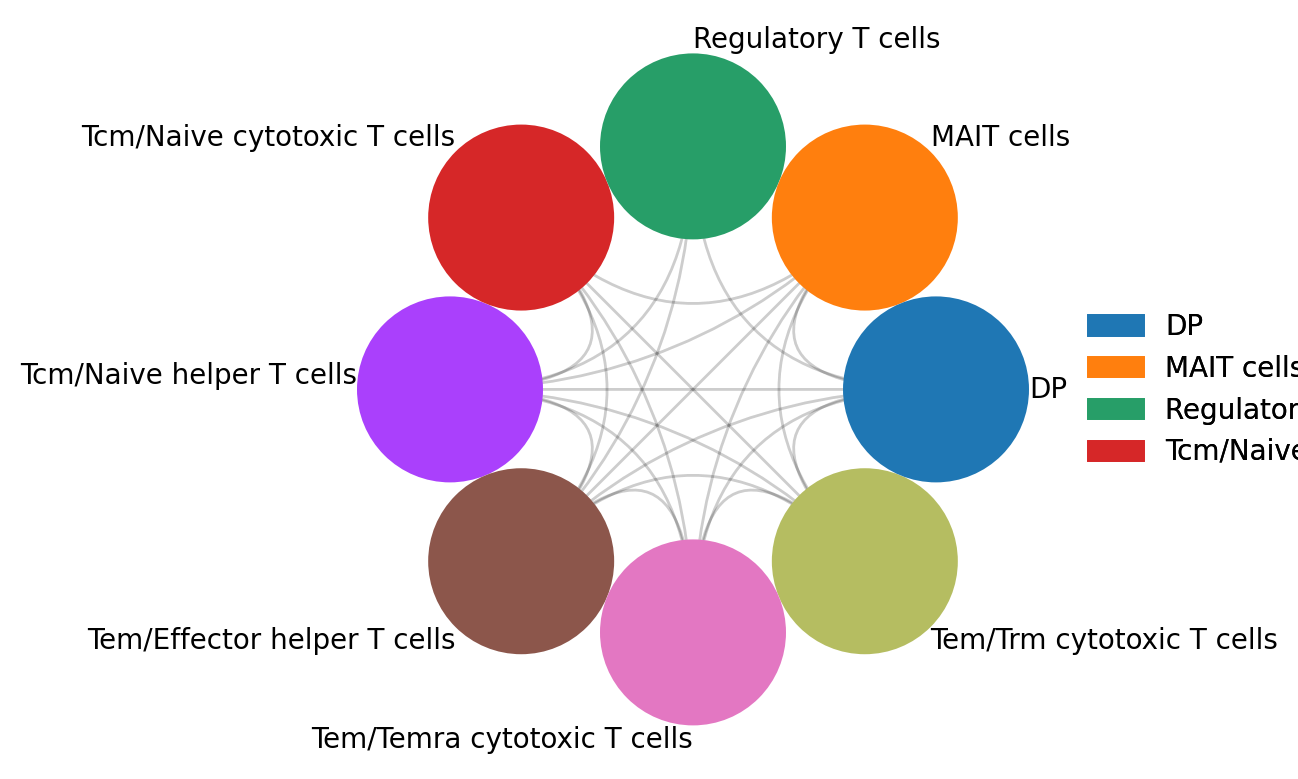

In [107]:
ddl.pl.clone_overlap(
    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=False
)
# something is wrong here... 

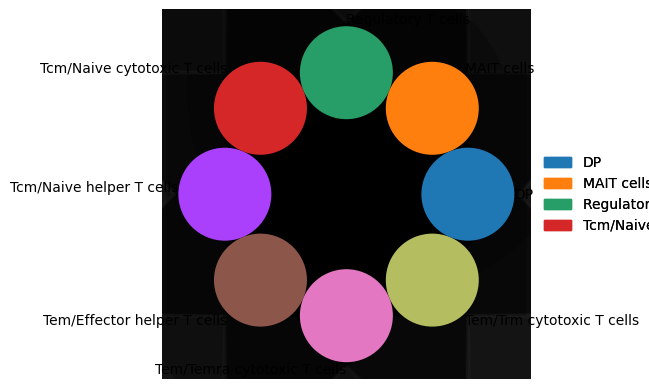

In [37]:
ddl.pl.clone_overlap(
    adatax, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


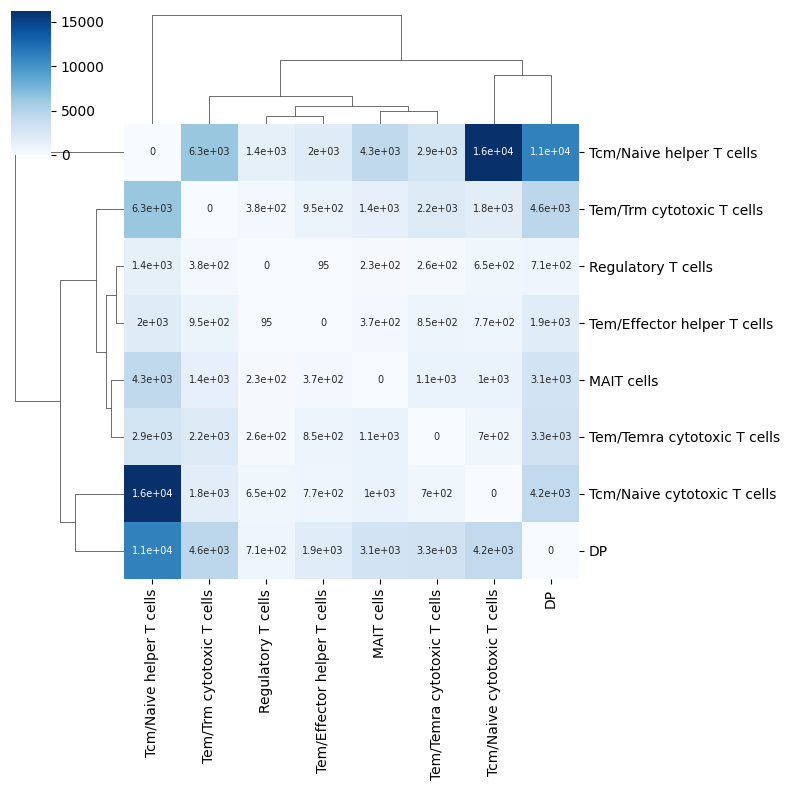

In [38]:
ddl.pl.clone_overlap(
    adatax,
    groupby="celltypist_annotation",
    colorby="celltypist_annotation",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 7},
)

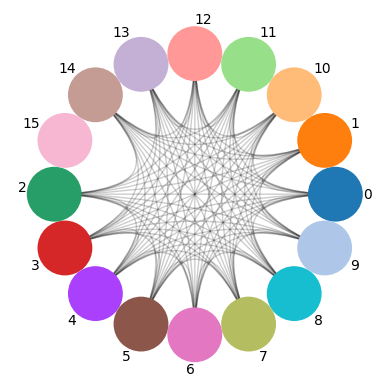

In [39]:
ddl.tl.clone_overlap(
    adatax, groupby="leiden", colorby="leiden", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax, groupby="leiden", colorby="leiden", weighted_overlap=False
)

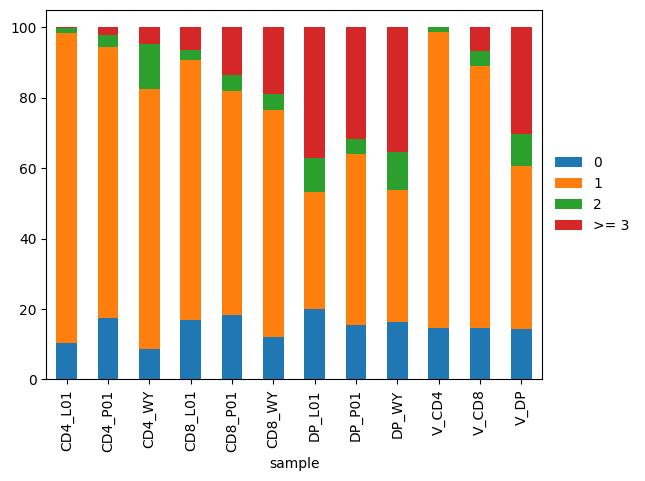

In [40]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size_max_3"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)


If most are singletons, where do we get this perfect sharing???

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

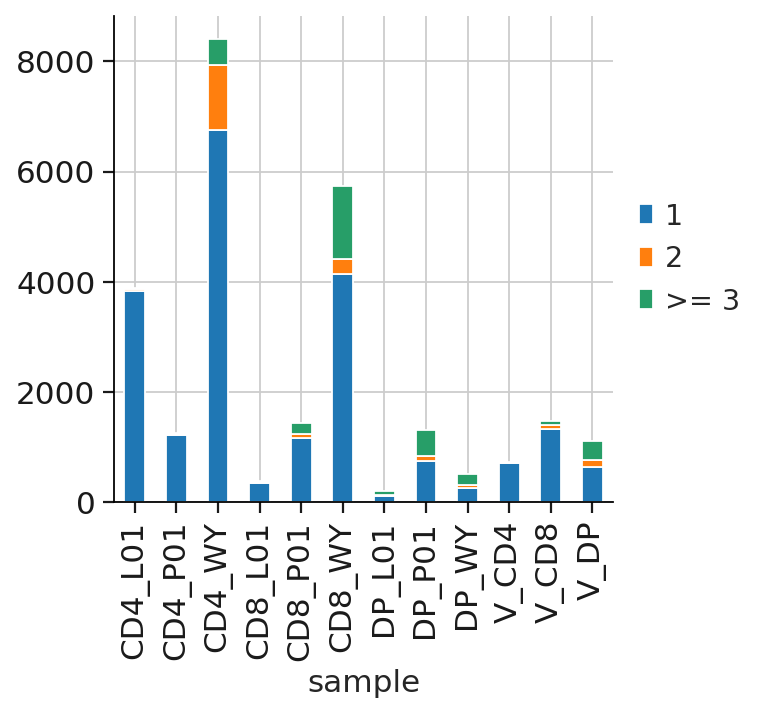

In [56]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size_max_3"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

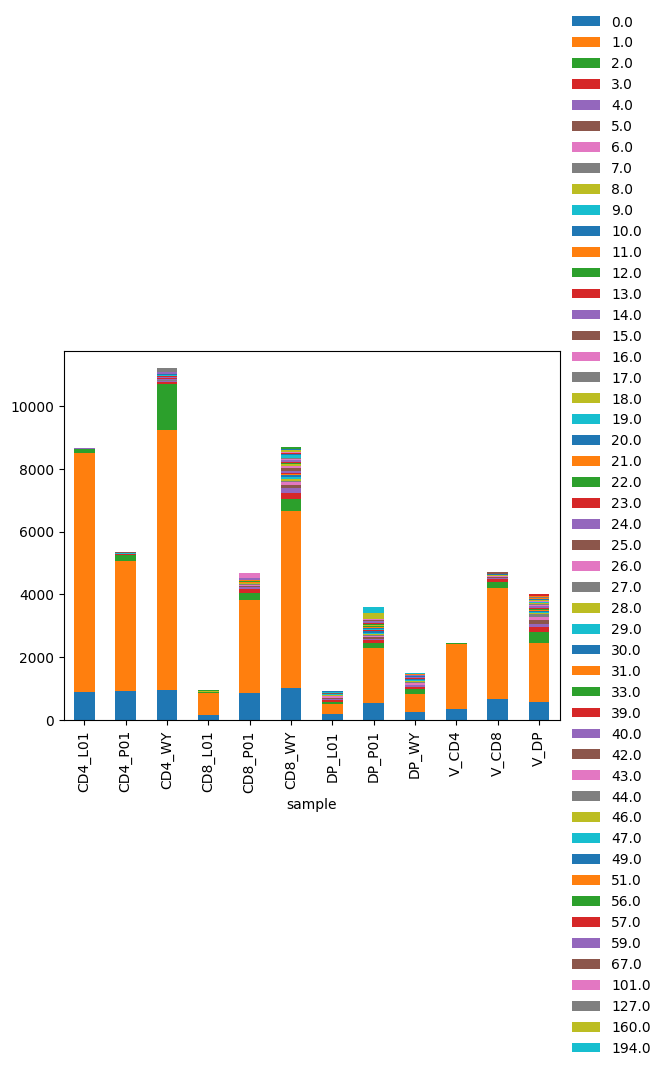

In [41]:
pd.crosstab(
    adatax.obs["sample"],
    adatax.obs["clone_id_size"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [ ]:
## too much sharing... 
# try to subset by donor and rerun find clone size etc... 

#### Get L01 to try

In [55]:
adatax_L01 = adatax[adatax.obs['donor'] == "L01"]
adatax_L01.obs


,sample,sort_type,donor,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet_score,n_genes,gmm_pct_count_clusters_keep,...,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ,clone_id_size,clone_id_size_max_3,nhood_ixs_random,nhood_ixs_refined,nhood_kth_distance
CD4_L01_AAACCTGAGGCAGTCA-1,CD4_L01,CD4,L01,507,1141.0,4.0,0.350570,0.216129,507,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.000000
CD4_L01_AAACCTGAGTCAAGCG-1,CD4_L01,CD4,L01,602,1410.0,16.0,1.134752,0.408219,602,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.000000
CD4_L01_AAACCTGAGTCCTCCT-1,CD4_L01,CD4,L01,433,1064.0,7.0,0.657895,0.188953,433,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.000000
CD4_L01_AAACCTGCACAAGTAA-1,CD4_L01,CD4,L01,726,2008.0,6.0,0.298805,0.201835,726,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.000000
CD4_L01_AAACCTGCAGACTCGC-1,CD4_L01,CD4,L01,565,1598.0,1.0,0.062578,0.139860,565,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,1,0.149491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP_L01_TTGACTTCAAGCCCAC-1,DP_L01,DP,L01,211,253.0,5.0,1.976285,0.181818,211,True,...,None,TRB + TRA,Single pair,standard,standard,15.0,>= 3,0,0,0.000000
DP_L01_TTGGCAAGTAAGCACG-1,DP_L01,DP,L01,1545,4185.0,1.0,0.023895,0.084416,1545,True,...,None,TRB + TRA,Single pair,standard,standard,4.0,>= 3,0,0,0.000000
DP_L01_TTTCCTCGTTGGTAAA-1,DP_L01,DP,L01,854,1591.0,3.0,0.188561,0.105590,854,True,...,None,TRB + TRA,Single pair,standard,standard,4.0,>= 3,0,0,0.000000
DP_L01_TTTGCGCAGGGTTTCT-1,DP_L01,DP,L01,350,657.0,1.0,0.152207,0.197674,350,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.000000


In [57]:
ddl.tl.clone_overlap(
    adatax_L01, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

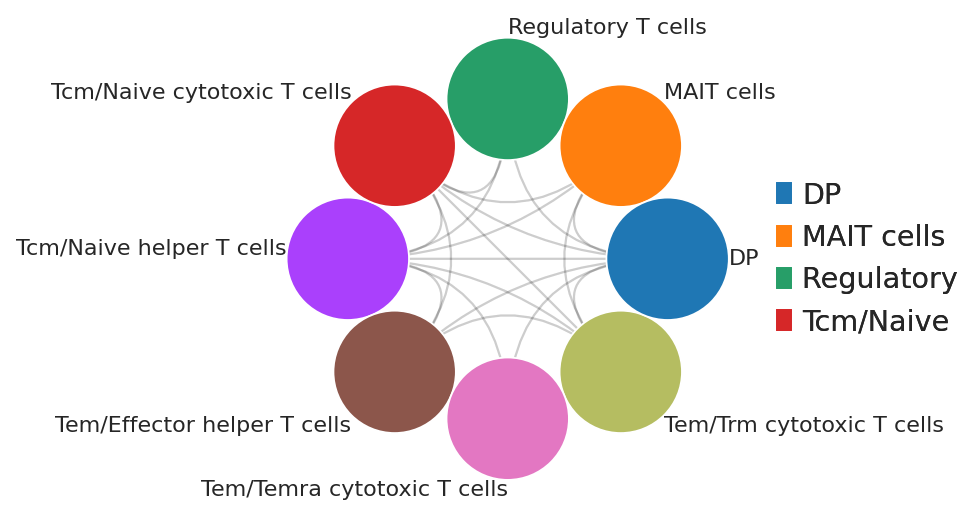

In [58]:
ddl.pl.clone_overlap(
    adatax_L01, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=False
)

#### What about WY? 

In [59]:
adatax_WY = adatax[adatax.obs['donor'] == "WY"]
adatax_WY.obs

,sample,sort_type,donor,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,scrublet_score,n_genes,gmm_pct_count_clusters_keep,...,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ,clone_id_size,clone_id_size_max_3,nhood_ixs_random,nhood_ixs_refined,nhood_kth_distance
CD4_WY_AAACCTGAGAATGTTG-1,CD4_WY,CD4,WY,2397,7956.0,108.0,1.357466,0.360190,2397,True,...,Multi,Extra VDJ + Extra VJ,Extra pair,standard,standard,7.0,>= 3,0,0,0.0
CD4_WY_AAACCTGAGGGTATCG-1,CD4_WY,CD4,WY,946,2320.0,27.0,1.163793,0.158672,946,True,...,None,TRB + TRA,Single pair,standard,standard,2.0,2,0,0,0.0
CD4_WY_AAACCTGAGGTGATAT-1,CD4_WY,CD4,WY,1500,3912.0,42.0,1.073620,0.154217,1500,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.0
CD4_WY_AAACCTGAGGTTCCTA-1,CD4_WY,CD4,WY,1124,3057.0,27.0,0.883219,0.178523,1124,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.0
CD4_WY_AAACCTGCAATAGAGT-1,CD4_WY,CD4,WY,1433,4701.0,59.0,1.255052,0.343964,1433,True,...,None,TRB + TRA,Single pair,standard,standard,1.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP_WY_TTGCGTCTCGCCCTTA-1,DP_WY,DP,WY,517,1078.0,6.0,0.556586,0.305785,517,True,...,None,TRB + TRA,Single pair,standard,standard,4.0,>= 3,0,0,0.0
DP_WY_TTGGAACTCTTAGAGC-1,DP_WY,DP,WY,530,948.0,10.0,1.054852,0.129445,530,True,...,None,TRB + TRA,Single pair,standard,standard,14.0,>= 3,0,0,0.0
DP_WY_TTGTAGGCATGCTGGC-1,DP_WY,DP,WY,376,756.0,3.0,0.396825,0.274559,376,True,...,None,TRB + TRA,Single pair,standard,standard,2.0,2,0,0,0.0
DP_WY_TTTGCGCGTTCGCTAA-1,DP_WY,DP,WY,442,670.0,4.0,0.597015,0.248260,442,True,...,None,TRB + TRA,Single pair,standard,standard,14.0,>= 3,0,0,0.0


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

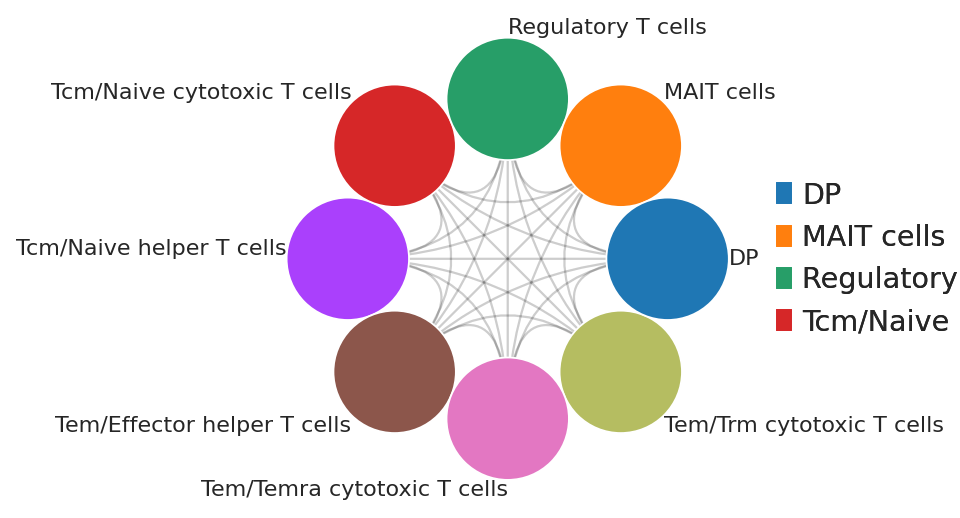

In [60]:
ddl.tl.clone_overlap(
    adatax_WY, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=True
)
ddl.pl.clone_overlap(
    adatax_WY, groupby="celltypist_annotation", colorby="celltypist_annotation", weighted_overlap=False
)

# VDJ PSEUDOBULK

In [42]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore")

In [43]:
import milopy.core as milo
import palantir

#required because of Palantir
%matplotlib inline

sc.settings.set_figure_params(dpi=80)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Prior to performing the pseudobulking, it is recommended to run ddl.tl.setup_vdj_pseudobulk(). This will subset the object to just cells with at least a pair of chains, and prepare appropriately named and formatted columns for the pseudobulking function to use as defaults.

In [44]:
adatax = ddl.tl.setup_vdj_pseudobulk(adatax)

We’re going to be using Milopy to create pseudobulks. Construct a neighbour graph with many neighbours, following Milopy protocol, and then sample representative neighbourhoods from the object. This saves a cell-by-pseudobulk matrix into adata.obsm["nhoods"]. Use this graph to generate a UMAP as well.

In [45]:
adatax

AnnData object with n_obs × n_vars = 26382 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VD

In [46]:
sc.pp.neighbors(adatax, use_rep="X_umap", n_neighbors=50)
milo.make_nhoods(adatax)
sc.tl.umap(adatax)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Now we are armed with everything we need to construct the VJ feature space. Pseudobulks can be defined either via passing a list of .obs metadata columns, the unique values of the combination of which will serve as individual pseudobulks (via obs_to_bulk), or via an explicit cell-by-pseudobulk matrix (via pbs). Milopy created one of those for us, so we can use that as input.

In [47]:
adatax

AnnData object with n_obs × n_vars = 26382 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch', 'CD4/CD8_geneset', 'leiden', 'celltypist_majority_voting', 'celltypist_annotation', 'has_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_abT_VDJ_main', 'd_call_abT_VD

The cell type annotation lives in .obs["anno_lvl_2_final_clean"]. Let’s tell the function that we want to take the most common value per pseudobulk with us to the new VJ feature space object.

In [48]:
pb_adatax = ddl.tl.vdj_pseudobulk(
    adatax, pbs=adatax.obsm["nhoods"], obs_to_take="celltypist_annotation"
)

The new object has pseudobulks as observations, and the unique encountered VJ genes as the features. We can see the per-pseudobulk annotation, and .obsm["pbs"]. In our case it’s just a copy of the pbs argument, but if we were to go for obs_to_bulk this would be a cells by pseudobulks matrix capturing the assignment of the original cells.

In [49]:
pb_adatax

AnnData object with n_obs × n_vars = 2470 × 157
    obs: 'celltypist_annotation', 'celltypist_annotation_fraction', 'cell_count'
    obsm: 'pbs'

Now that we have our VJ feature space pseudobulk object, we can do things with it. Let’s run a PCA on it. The development trajectory is very nicely captured in the first two PC dimensions.

In [50]:
sc.tl.pca(pb_adatax)


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

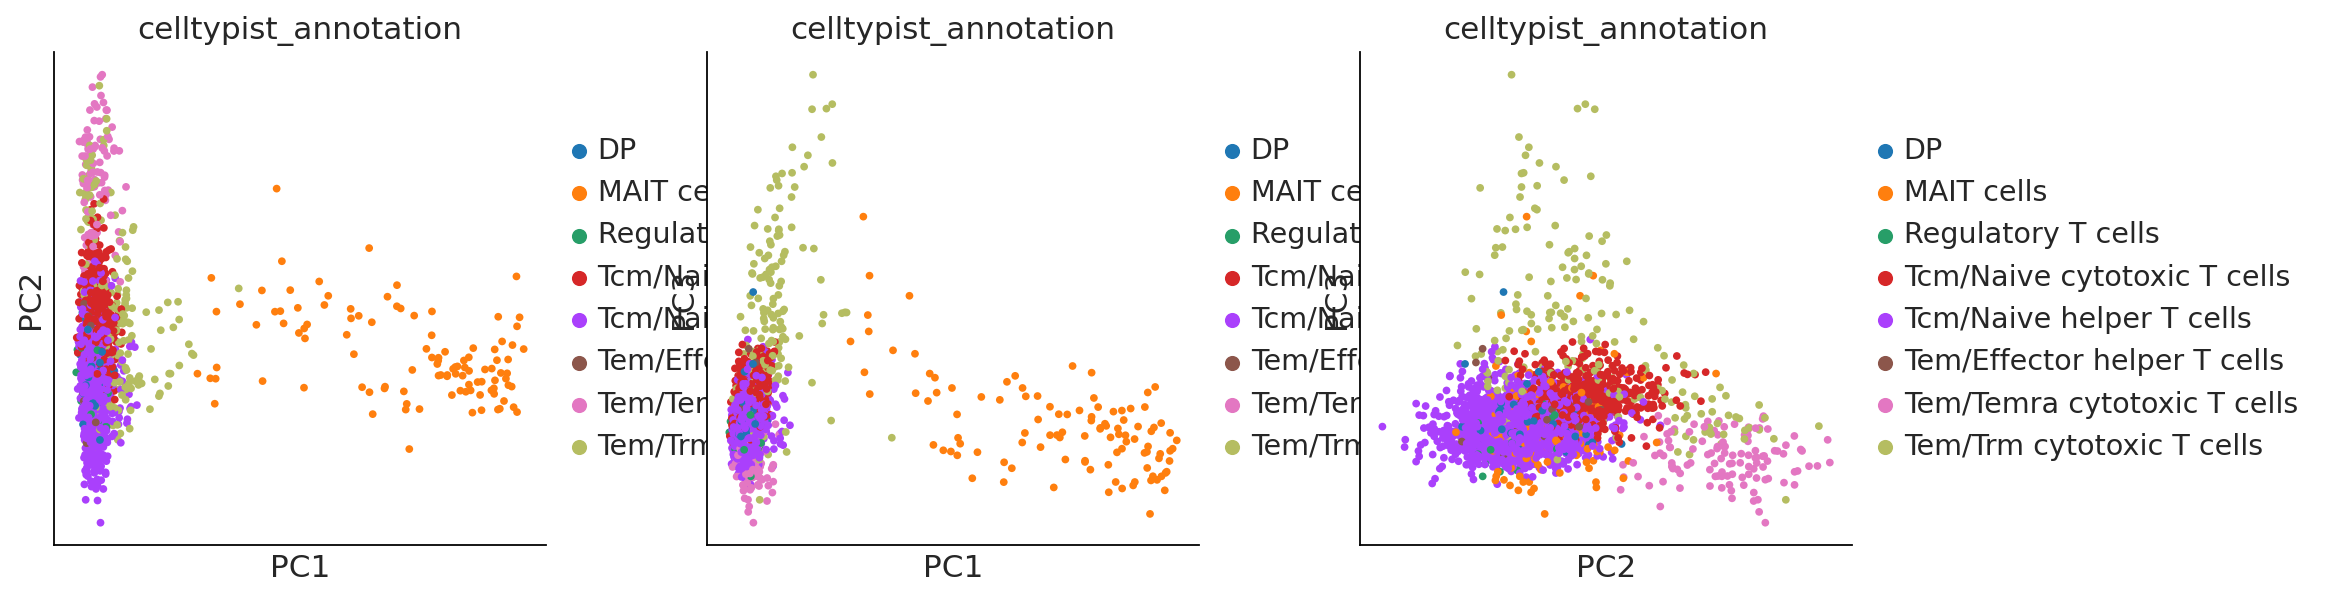

In [51]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(0,1), (0,2), (1,2)])

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

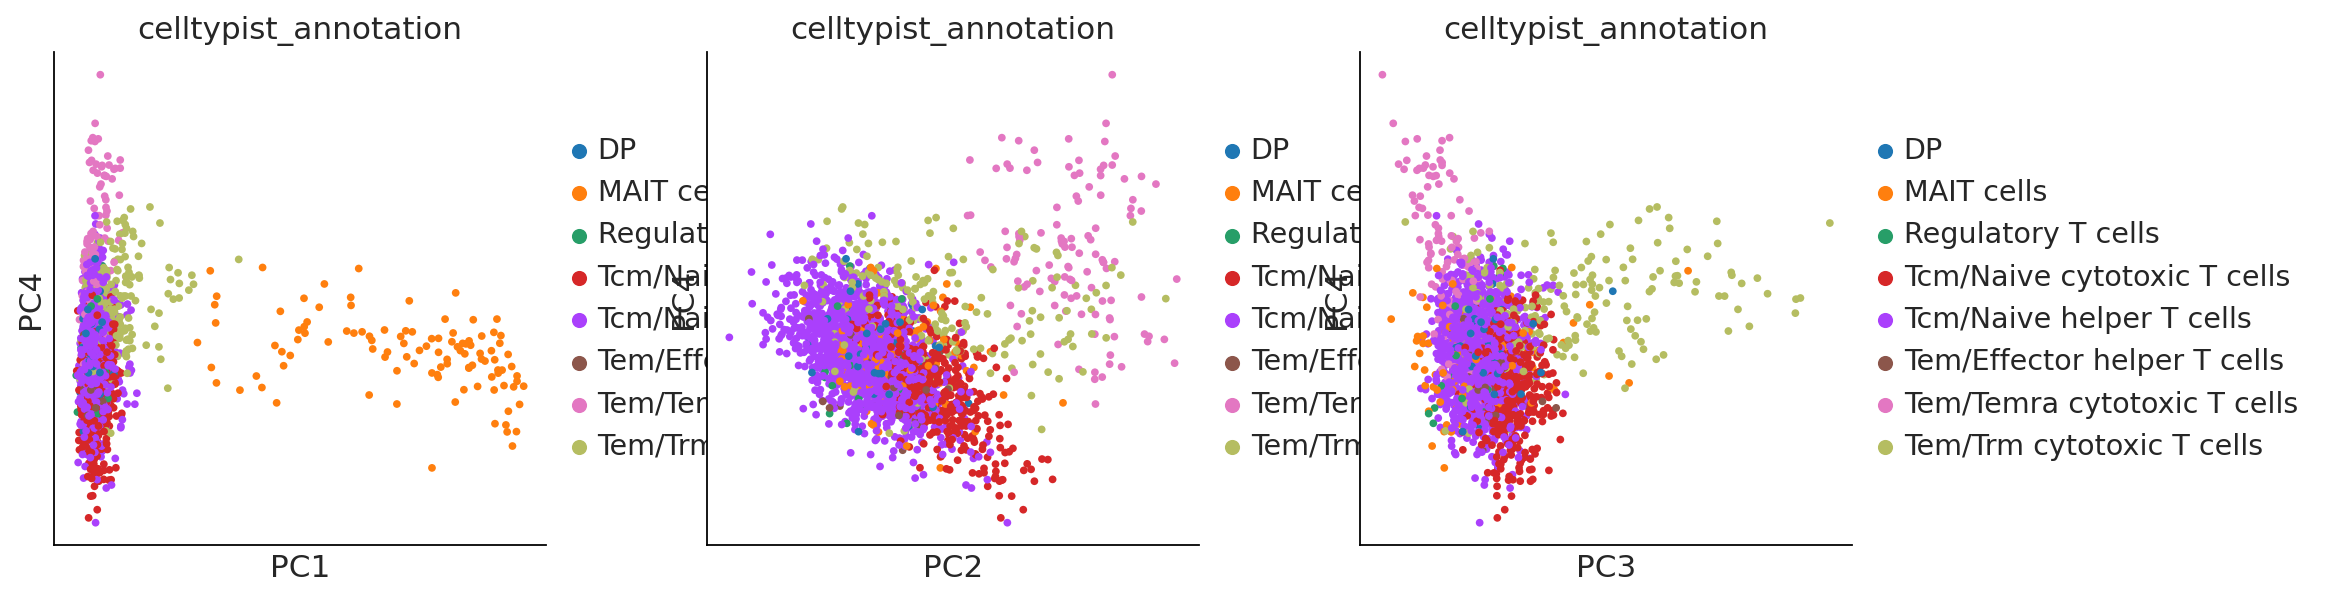

In [52]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(0,3), (1,3), (2,3)])

Maybe PC2/4?? 

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

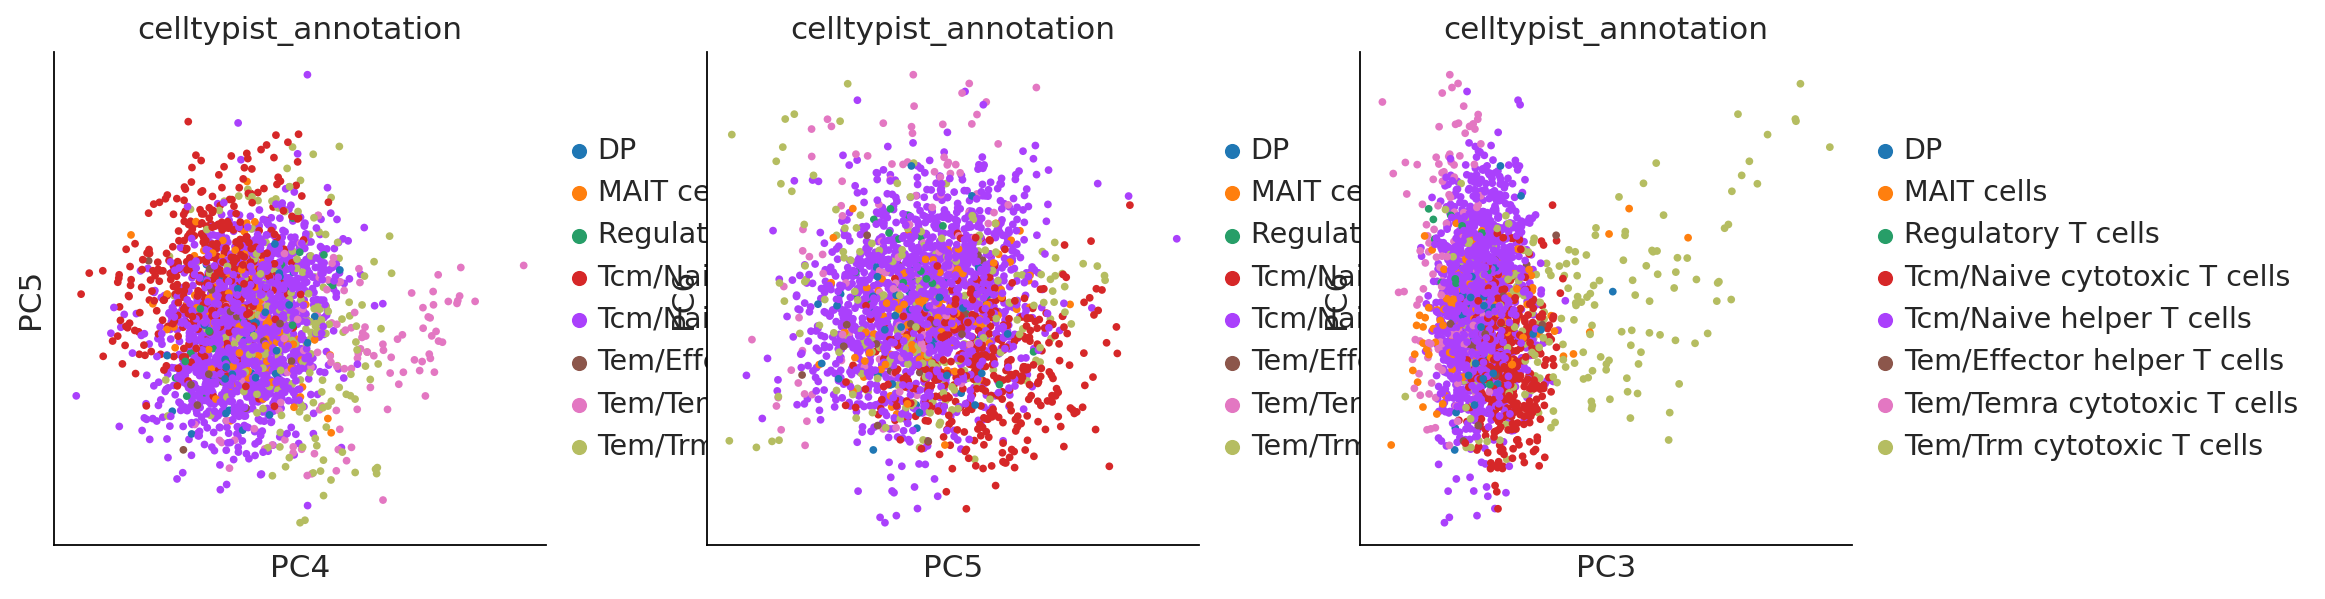

In [54]:
sc.pl.pca(pb_adatax, color="celltypist_annotation", dimensions= [(3,4), (4,5), (2,5)])

Let’s make a UMAP of the pseudobulks.

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

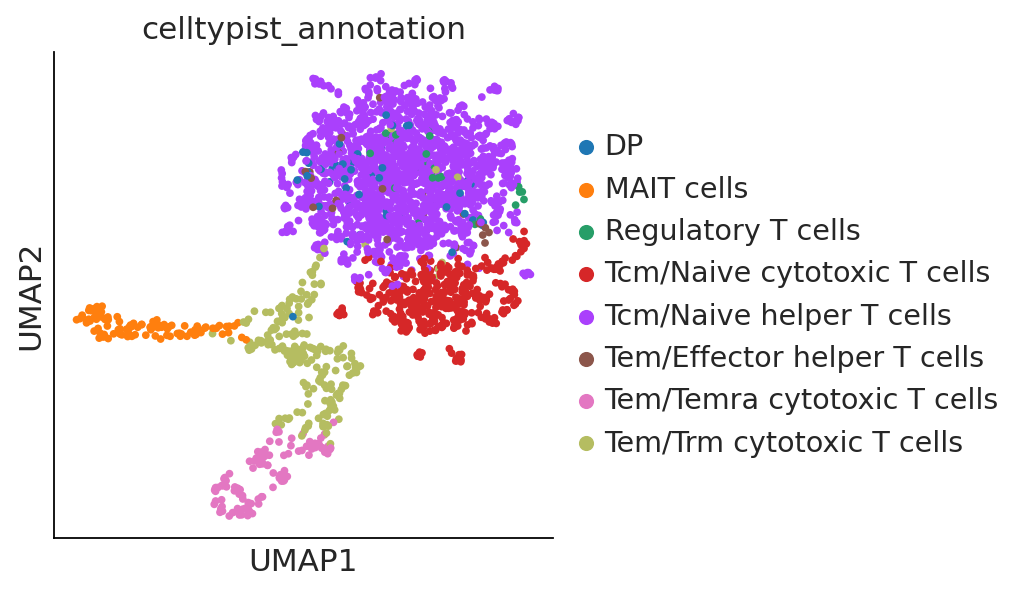

In [53]:
sc.pp.neighbors(pb_adatax)
sc.tl.umap(pb_adatax)
sc.pl.umap(pb_adatax, color="celltypist_annotation")

# tl.vj_usage_pca

You can also compute the V/J gene usage in your various groups of interest. This function will return a new AnnData where instead of cells (obs) by gene (var), it will be groupby (obs) by V/J genes (var).

For example, I’m interested if the leiden clusters within each donor’s sample use V/J genes differently:

In [61]:
# first make a concatenated group
adatax.obs["donor_annotation"] = [
    s + "_" + l for s, l in zip(adatax.obs["donor"], adatax.obs["celltypist_annotation"])
]
new_adatax = ddl.tl.vj_usage_pca(
    adatax,
    groupby="donor_annotation",
    mode="abT",  # because B=B cells, use abT and gdT for alpha-beta and gamma-delta T cells respectively
    transfer_mapping=[
        "donor",
        "celltypist_annotation",
    ],  # this transfers the sample_id and leiden values separately. if not provided, only sample_id_leiden is transferred.
    n_comps=10,  # 3 because the example is small here. the default is set at 30
)
new_adatax


AnnData object with n_obs × n_vars = 32 × 157
    obs: 'cell_type', 'cell_count', 'donor', 'celltypist_annotation'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

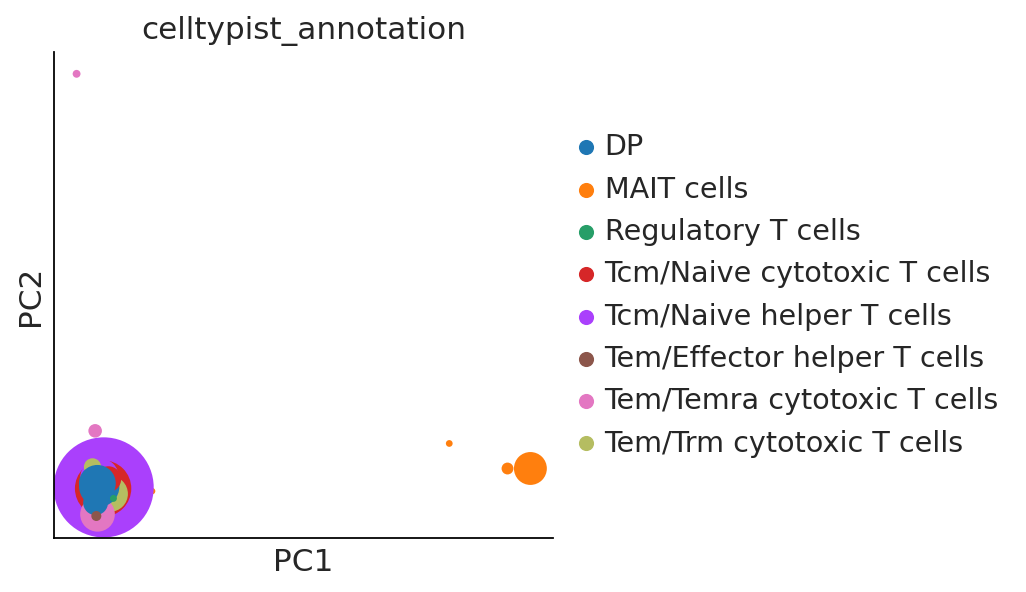

In [62]:
sc.set_figure_params()

sc.pl.pca(new_adatax, color="celltypist_annotation", size=new_adatax.obs["cell_count"])
# each dot is a `sample_id_leiden`. Check the .obs

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

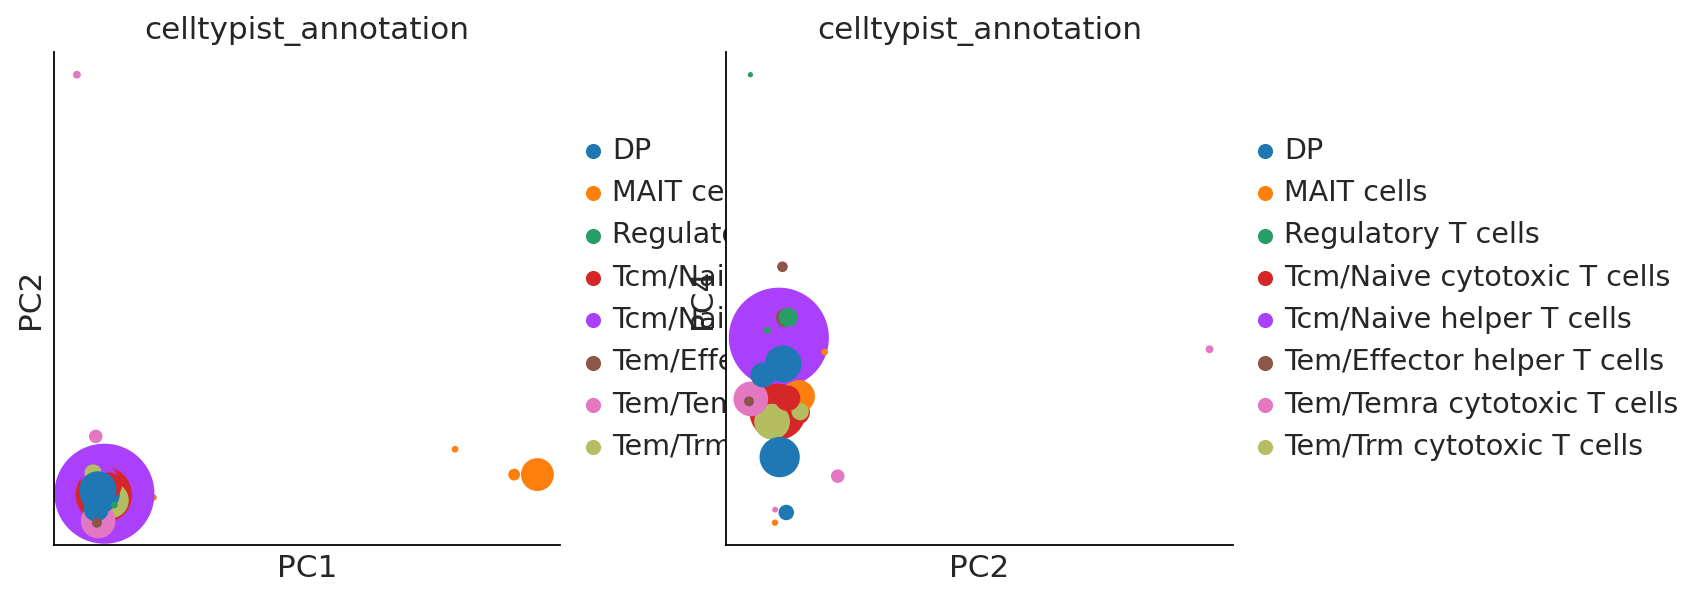

In [63]:
sc.pl.pca(new_adatax, color="celltypist_annotation", size=new_adatax.obs["cell_count"], dimensions= [(0,1), (1,3)])